<a href="https://colab.research.google.com/github/konarksharma2001/pthon/blob/main/Q1_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q.1 
Load the load_digit dataset from sklearn.datasets.
This dataset is made up of 1797 8x8 images. Each image, is of a hand-written digit. Therefore, each training example has 64 features (8X8) pixel values. Hence, the size of dataset is 1797X64.

Implement SVD in the following two ways:

(a)	Step-by-step

(b)	Using inbuilt SVD function in python

##Step By Step

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [ ]:
A=np.dot(X,X.T)
print(A.shape)

(1797, 1797)


In [ ]:
values, vectors = np.linalg.eig(np.sqrt(A))
values[:5]
print(values.shape)

(1797,)


In [ ]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.8298325736820085, 0.028387531016935696, 0.025965262037967913, 0.022699658194926666, 0.016173729155810553, 0.010834340128454648, 0.008764847363960788, 0.00797561707334064, 0.006702174936296447, 0.00628425082229822, 0.004493512523589924, 0.0043406577471158956, 0.0035930442744519188, 0.0033131683194679326, 0.002876179091230396, 0.002526956447139833, 0.002455632146802912, 0.00230369723284105, 0.001853563541516391, 0.001776117304560885, 0.001613134069385899, 0.001462659065859496, 0.0014087919315691464, 0.0013293406956602536, 0.0012708984532293977, 0.001083789469665144, 0.0010145941080161943, 0.0009429322248775533, 0.0008644618172384967, 0.0007812791294473132, -0.0007019300793764773, 0.0006707621196236174, 0.0006463379089265979, -0.0005475738221504428, 0.0005995418612318218, 0.000578959161487809, 0.0005333408484489886, 0.000522760143028491, -0.00048139441833601666, -0.00048237894514586733, 0.00045826749581983446, -0.00037850511679331217, 0.00040200903824199637, 0.0003921535077298548

Text(0.5, 0, 'Principal components')

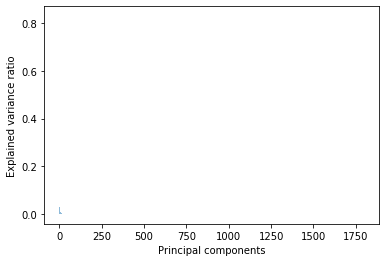

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

plt.bar(range(1797), explained_variances, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')


In [ ]:
sigma = np.zeros((1797, 2), int)

In [ ]:
sigma[0,0]=np.sqrt(values[0])
sigma[1,1]=np.sqrt(values[1])


print(sigma)

[[303   0]
 [  0  56]
 [  0   0]
 ...
 [  0   0]
 [  0   0]
 [  0   0]]


In [ ]:
X_new=np.dot(vectors,sigma)
print(X_new)

[[ 6.75178218  0.07736643]
 [ 7.42485498 -0.7044582 ]
 [ 7.44977175 -0.6416403 ]
 ...
 [ 8.07481387 -0.93135778]
 [ 7.64122453  0.40306828]
 [ 8.01167519  0.02660079]]


In [ ]:
from scipy.linalg import svd
u,s,v= svd(X)
sigma=np.diag(s)
print(s.shape)
print(u.shape)
X_new=np.dot(u[:,:64],sigma[:,:2])
print(X_new)

(64,)
(1797, 1797)
[[45.86127719 -1.19211574]
 [55.52967927  7.86176977]
 [55.8278837   6.91459576]
 ...
 [65.52698526 10.65872857]
 [58.60616587 -4.9112521 ]
 [64.44823101 -0.45551347]]


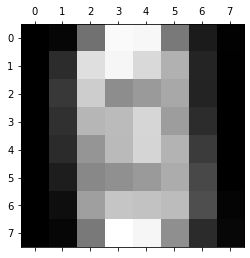

In [ ]:
#using inbuilt function for truncated SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)
image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))
image_reduced = image_reduced.reshape((8,8))
plt.matshow(image_reduced, cmap = 'gray')